In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
path = "./IBD_data.csv"
df = pd.read_csv(path)
df = df.set_index('Unnamed: 0') # Prendre sample_name comme index
df = df.drop("sample_name",axis="columns") # L'enlever du df
df = df.dropna(axis=1,how='all') # Drop les colonnes ou on a que des NA values 
df = df.dropna(axis=0,how='any') # Drop les lignes ou on a au moins une NA value

In [81]:
path_2 = "./IBD_data/IBD_data/rawData/1939_20180418-110402.txt"
df_2 = pd.read_csv(path_2,sep="\t")
df_2

,sample_name,age,age_unit,altitude,anonymized_name,antibiotics,b_cat,biologics,biopsy_location,birthdate,...,qiita_study_id,race,sample_type,scientific_name,sex,smoking,steroids,taxon_id,title,type_sample
0,1939.100001,19.000000,years,0,100001,False,Missing: Restricted access,Missing: Restricted access,stool,Missing: Restricted access,...,1939,Missing: Not provided,stool,human gut metagenome,male,Never,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,stool
1,1939.100003,26.000000,years,0,100003,False,Missing: Restricted access,Missing: Restricted access,stool,Missing: Restricted access,...,1939,Missing: Not provided,stool,human gut metagenome,male,Current,true,408170,The Treatment-Naive Microbiome in New-Onset Cr...,stool
2,1939.100009,55.000000,years,0,100009,False,Missing: Restricted access,Missing: Restricted access,stool,Missing: Restricted access,...,1939,Missing: Not provided,stool,human gut metagenome,male,Never,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,stool
3,1939.100015,57.000000,years,0,100015,False,Missing: Restricted access,Missing: Restricted access,stool,Missing: Restricted access,...,1939,Missing: Not provided,stool,human gut metagenome,female,Current,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,stool
4,1939.100016,46.000000,years,0,100016,False,Missing: Restricted access,Missing: Restricted access,stool,Missing: Restricted access,...,1939,Missing: Not provided,stool,human gut metagenome,male,Never,true,408170,The Treatment-Naive Microbiome in New-Onset Cr...,stool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1939.SKBTI092.b,7.583333,years,0,SKBTI092,False,B1,false,Terminal ileum,Missing: Restricted access,...,1939,other,biopsy,human gut metagenome,male,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy
1355,1939.SKBTI093,12.750000,years,0,SKBTI093,False,B1,false,Terminal ileum,Missing: Restricted access,...,1939,other,biopsy,human gut metagenome,male,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy
1356,1939.SKBTI094,8.166667,years,0,SKBTI094,False,B1,false,Terminal ileum,Missing: Restricted access,...,1939,caucasian,biopsy,human gut metagenome,male,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy
1357,1939.SKBTI095,14.083333,years,0,SKBTI095,False,B1,false,Terminal ileum,Missing: Restricted access,...,1939,other,biopsy,human gut metagenome,female,Missing: Not provided,false,408170,The Treatment-Naive Microbiome in New-Onset Cr...,biopsy


In [72]:
# print(df.isna().sum())         # nombre de NaN par colonne
# print(len(df) - df.isna().sum())  # nombre de non-NaN par colonne

In [73]:
for column in df.columns : 
    print(f"{column} est de type {df[column].dtype}, on a : {len(df[column].value_counts())} valeurs distinctes")

project_name est de type object, on a : 1 valeurs distinctes
bioproject est de type object, on a : 1 valeurs distinctes
is_available est de type object, on a : 1 valeurs distinctes
run_name est de type object, on a : 393 valeurs distinctes
second_sample_name est de type object, on a : 393 valeurs distinctes
number_bases est de type int64, on a : 393 valeurs distinctes
instrument_model est de type object, on a : 1 valeurs distinctes
disease est de type object, on a : 2 valeurs distinctes
phenotype est de type object, on a : 2 valeurs distinctes
country est de type object, on a : 2 valeurs distinctes
sex est de type object, on a : 2 valeurs distinctes
age est de type float64, on a : 51 valeurs distinctes
age_category est de type object, on a : 4 valeurs distinctes
BMI est de type float64, on a : 158 valeurs distinctes


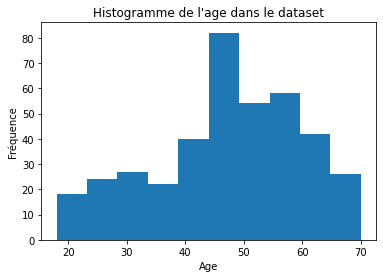

In [ ]:
df["age"].plot.hist()
plt.xlabel("Age")
plt.ylabel("Fréquence")
plt.title("Histogramme de l'age dans le dataset")
plt.show()

In [77]:
df.shape

(393, 14)